<a href="https://colab.research.google.com/github/asiessoyunanubre/Mineria-De-Datos/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== CARGANDO DATOS ===


Saving university_student_data.csv to university_student_data (6).csv
Archivo detectado: university_student_data (6).csv
Dimensiones: (20, 11)

Primeras filas:
   Year    Term  Applications  Admitted  Enrolled  Retention Rate (%)  \
0  2015  Spring          2500      1500       600                  85   
1  2015    Fall          2500      1500       600                  85   
2  2016  Spring          2600      1550       625                  86   
3  2016    Fall          2600      1550       625                  86   
4  2017  Spring          2700      1600       650                  87   

   Student Satisfaction (%)  Engineering Enrolled  Business Enrolled  \
0                        78                   200                150   
1                        78                   200                150   
2                        79                   210                160   
3                        79                   210                160   
4                        80              

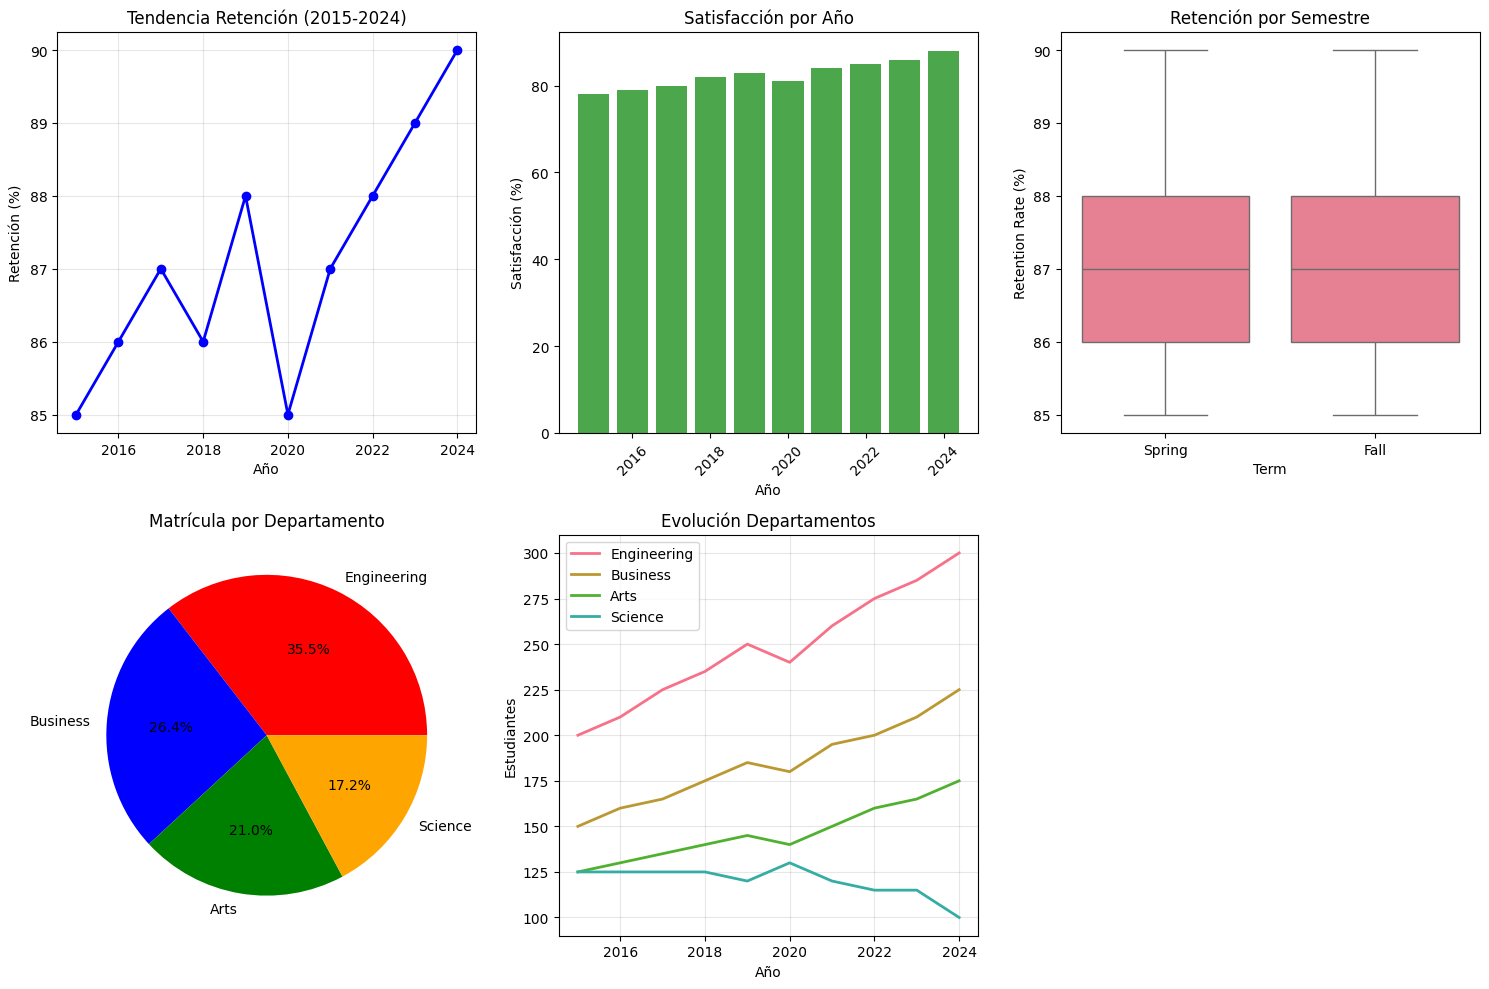

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== HALLAZGOS PRINCIPALES ===
- Retención aumentó: 85.0% → 90.0%
- Satisfacción mejoró: 78.0% → 88.0%
- Ingeniería es el departamento más grande (35.5%)
RECOMENDACIÓN: Fortalecer programas en Ciencias para balancear matrícula
✅ ¡Código ejecutado correctamente!
📁 Archivos listos para descargar:
   - app.py (Dashboard Streamlit)
   - requirements.txt (Dependencias)
   - README.md (Documentación)


In [ ]:
# ANÁLISIS UNIVERSITARIO - CÓDIGO CORREGIDO
!pip install streamlit pandas matplotlib seaborn plotly -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
import io

# Configuración
plt.style.use('default')
sns.set_palette("husl")

# 1. CARGAR DATOS - VERSIÓN CORREGIDA
print("=== CARGANDO DATOS ===")
uploaded = files.upload()

# Obtener el nombre real del archivo (solución al error)
file_name = list(uploaded.keys())[0]
print(f"Archivo detectado: {file_name}")

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Exploración
print(f"Dimensiones: {df.shape}")
print("\nPrimeras filas:")
print(df.head())

# 2. VISUALIZACIONES
# Gráfico 1: Retención
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
retention_by_year = df.groupby('Year')['Retention Rate (%)'].mean()
plt.plot(retention_by_year.index, retention_by_year.values, marker='o', linewidth=2, color='blue')
plt.title('Tendencia Retención (2015-2024)')
plt.xlabel('Año')
plt.ylabel('Retención (%)')
plt.grid(True, alpha=0.3)

# Gráfico 2: Satisfacción
plt.subplot(2, 3, 2)
satisfaction_by_year = df.groupby('Year')['Student Satisfaction (%)'].mean()
plt.bar(satisfaction_by_year.index, satisfaction_by_year.values, alpha=0.7, color='green')
plt.title('Satisfacción por Año')
plt.xlabel('Año')
plt.ylabel('Satisfacción (%)')
plt.xticks(rotation=45)

# Gráfico 3: Comparación semestres
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Term', y='Retention Rate (%)')
plt.title('Retención por Semestre')

# Gráfico 4: Departamentos
plt.subplot(2, 3, 4)
dept_columns = ['Engineering Enrolled', 'Business Enrolled', 'Arts Enrolled', 'Science Enrolled']
dept_totals = df[dept_columns].sum()
plt.pie(dept_totals, labels=[dept.split()[0] for dept in dept_columns], autopct='%1.1f%%', colors=['red', 'blue', 'green', 'orange'])
plt.title('Matrícula por Departamento')

# Gráfico 5: Evolución departamentos
plt.subplot(2, 3, 5)
dept_by_year = df.groupby('Year')[dept_columns].mean()
for dept in dept_columns:
    plt.plot(dept_by_year.index, dept_by_year[dept], label=dept.split()[0], linewidth=2)
plt.title('Evolución Departamentos')
plt.xlabel('Año')
plt.ylabel('Estudiantes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. CREAR ARCHIVOS PARA STREAMLIT
# app.py
app_code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

st.set_page_config(page_title="Dashboard Universitario", layout="wide")
st.title(" Dashboard Analítico - Datos Universitarios")

@st.cache_data
def load_data():
    return pd.read_csv("university_student_data.csv")

df = load_data()

# Filtros
st.sidebar.header("Filtros")
selected_years = st.sidebar.multiselect("Años:", options=sorted(df["Year"].unique()), default=sorted(df["Year"].unique()))
selected_terms = st.sidebar.multiselect("Semestres:", options=df["Term"].unique(), default=df["Term"].unique())

filtered_df = df[(df["Year"].isin(selected_years)) & (df["Term"].isin(selected_terms))]

# KPIs
col1, col2, col3, col4 = st.columns(4)
with col1:
    st.metric("Retención Promedio", f"{filtered_df['Retention Rate (%)'].mean():.1f}%")
with col2:
    st.metric("Satisfacción Promedio", f"{filtered_df['Student Satisfaction (%)'].mean():.1f}%")
with col3:
    st.metric("Total Matriculados", f"{filtered_df['Enrolled'].sum():,}")
with col4:
    admission_rate = (filtered_df['Admitted'].sum() / filtered_df['Applications'].sum()) * 100
    st.metric("Tasa Admisión", f"{admission_rate:.1f}%")

# Gráficos
col1, col2 = st.columns(2)
with col1:
    fig = px.line(filtered_df, x="Year", y="Retention Rate (%)", color="Term", title="Retención por Año", markers=True)
    st.plotly_chart(fig, use_container_width=True)
with col2:
    fig = px.line(filtered_df, x="Year", y="Student Satisfaction (%)", color="Term", title="Satisfacción por Año", markers=True)
    st.plotly_chart(fig, use_container_width=True)

# Gráfico departamentos
dept_columns = ["Engineering Enrolled", "Business Enrolled", "Arts Enrolled", "Science Enrolled"]
dept_totals = filtered_df[dept_columns].sum()
fig = px.pie(names=dept_columns, values=dept_totals, title="Matrícula por Departamento")
st.plotly_chart(fig, use_container_width=True)

st.dataframe(filtered_df)
'''

with open('app.py', 'w') as f:
    f.write(app_code)

# requirements.txt
with open('requirements.txt', 'w') as f:
    f.write('streamlit\npandas\nplotly')

# README.md
readme = '''
# Dashboard Universitario

## Descripción
Dashboard para análisis de datos universitarios.

## Instrucciones
1. Subir archivos a GitHub
2. Conectar con Streamlit Cloud
3. Configurar app.py como main

## Equipo
[Nombres del equipo]
'''

with open('README.md', 'w') as f:
    f.write(readme)

# 4. DESCARGAR ARCHIVOS
from google.colab import files
files.download('app.py')
files.download('requirements.txt')
files.download('README.md')

# 5. HALLAZGOS
print("=== HALLAZGOS PRINCIPALES ===")
print(f"- Retención aumentó: {df[df['Year']==2015]['Retention Rate (%)'].mean():.1f}% → {df[df['Year']==2024]['Retention Rate (%)'].mean():.1f}%")
print(f"- Satisfacción mejoró: {df[df['Year']==2015]['Student Satisfaction (%)'].mean():.1f}% → {df[df['Year']==2024]['Student Satisfaction (%)'].mean():.1f}%")
print(f"- Ingeniería es el departamento más grande ({df['Engineering Enrolled'].sum()/df[['Engineering Enrolled','Business Enrolled','Arts Enrolled','Science Enrolled']].sum().sum()*100:.1f}%)")
print("RECOMENDACIÓN: Fortalecer programas en Ciencias para balancear matrícula")

print("✅ ¡Código ejecutado correctamente!")
print("📁 Archivos listos para descargar:")
print("   - app.py (Dashboard Streamlit)")
print("   - requirements.txt (Dependencias)")
print("   - README.md (Documentación)")